# MLP

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Processamento 

In [24]:
df = pd.read_csv(r"C:\Users\annab\OneDrive\Documentos\GitHub\Colabs\bases\data_prema.csv")

In [25]:
df['CLASSE'] = df['GESTACAO'].apply(lambda x: 1 if x in [1, 2, 3, 4] else 0)
print(df['CLASSE'].value_counts())

CLASSE
0    469381
1     56987
Name: count, dtype: int64


In [26]:
print(df.isnull().sum())
print(df.describe())
print(df['CLASSE'].value_counts())


CODESTAB        2785
CODMUNNASC         0
LOCNASC            0
IDADEMAE           0
ESTCIVMAE       3656
               ...  
PARIDADE           0
KOTELCHUCK         0
CONTADOR           0
ORIGEM        400157
CLASSE             0
Length: 62, dtype: int64
           CODESTAB    CODMUNNASC        LOCNASC       IDADEMAE  \
count  5.235830e+05  526368.00000  526368.000000  526368.000000   
mean   2.926934e+06  261216.64844       1.016441      26.436398   
std    2.457727e+06    4355.74106       0.189859       6.713817   
min    2.400000e+01  110012.00000       1.000000      11.000000   
25%    2.344882e+06  260600.00000       1.000000      21.000000   
50%    2.430711e+06  261110.00000       1.000000      26.000000   
75%    2.711958e+06  261160.00000       1.000000      31.000000   
max    9.954279e+06  530010.00000       9.000000      99.000000   

           ESTCIVMAE         ESCMAE     CODOCUPMAE     QTDFILVIVO  \
count  522712.000000  523782.000000  507445.000000  523369.000000   
me

In [27]:
df = df.drop(['IDADEPAI', 'DTNASCMAE','STDNEPIDEM', 'STDNNOVA','TPAPRESENT', 'STTRABPART','TPMETESTIM','IDANOMAL', 'CODANOMAL','CODOCUPMAE','CODESTAB', 'CODMUNNASC', 'LOCNASC', 'CODMUNRES', 'DTNASC', 'HORANASC','PARTO', 'PESO', 'APGAR1', 'APGAR5', 'DTCADASTRO', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA', 'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'DTULTMENST', 'CONSPRENAT', 'STCESPARTO', 'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'CODPAISRES', 'TPROBSON', 'KOTELCHUCK', 'CONTADOR', 'ORIGEM'], axis=1)

In [28]:
print(df.dtypes)

for col in df.columns:
    print(f"Coluna: {col}")
    print(df[col].unique())
    print()

IDADEMAE        int64
ESTCIVMAE     float64
ESCMAE        float64
QTDFILVIVO    float64
QTDFILMORT    float64
GESTACAO      float64
GRAVIDEZ      float64
CONSULTAS     float64
SEXO            int64
RACACOR       float64
ESCMAE2010    float64
SERIESCMAE    float64
RACACORMAE    float64
QTDGESTANT    float64
QTDPARTNOR    float64
QTDPARTCES    float64
SEMAGESTAC    float64
MESPRENAT     float64
ESCMAEAGR1    float64
PARIDADE        int64
CLASSE          int64
dtype: object
Coluna: IDADEMAE
[29 37 16 22 33 20 36 32 31 27 30 23 24 28 21 25 34 41 18 35 26 40 39 43
 38 19 15 14 17 45 44 42 13 50 46 47 52 48 12 51 53 11 57 58 99 49 55 54
 63 61 64 62 60]

Coluna: ESTCIVMAE
[ 1.  2.  9.  5. nan  4.  3.]

Coluna: ESCMAE
[ 9.  4.  5.  1.  3. nan  2.]

Coluna: QTDFILVIVO
[ 1.  0.  3.  2.  4. nan  9.  7.  5.  6.  8. 14. 11. 10. 13. 99. 12. 16.
 18. 15. 19. 30.]

Coluna: QTDFILMORT
[ 1.  0.  2. nan  4.  3.  9.  5. 10. 12.  7.  8.  6. 99. 13. 11. 21. 20.
 14. 17.]

Coluna: GESTACAO
[nan  3.  5.  6. 

# Modelo desbalanceado

In [29]:
X = df.drop('CLASSE', axis=1) 
y = df['CLASSE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))  


model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


c:\Users\annab\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=50, 
                    batch_size=32, 
                    verbose=1)


Epoch 1/50
10528/10528 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8902 - loss: 0.3590 - val_accuracy: 0.8921 - val_loss: 0.3421
Epoch 2/50
10528/10528 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8910 - loss: 0.3447 - val_accuracy: 0.8921 - val_loss: 0.3422
Epoch 3/50
10528/10528 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8922 - loss: 0.3422 - val_accuracy: 0.8921 - val_loss: 0.3426
Epoch 4/50
10528/10528 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.8920 - loss: 0.3426 - val_accuracy: 0.8921 - val_loss: 0.3421
Epoch 5/50
10528/10528 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.8913 - loss: 0.3441 - val_accuracy: 0.8921 - val_loss: 0.3426
Epoch 6/50
10528/10528 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.8914 - loss: 0.3438 - val_accuracy: 0.8921 - val_loss: 0.3422
Epoch 7/50
10528/10528 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.8918 - loss: 0.3430 - val_accuracy: 0.8921 - val_loss: 0.3421
Epoch 8/50
10528/10528 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 

In [32]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

3290/3290 ━━━━━━━━━━━━━━━━━━━━ 3s 957us/step - accuracy: 0.8927 - loss: 0.3410
Loss: 0.34279724955558777, Accuracy: 0.8918536305427551


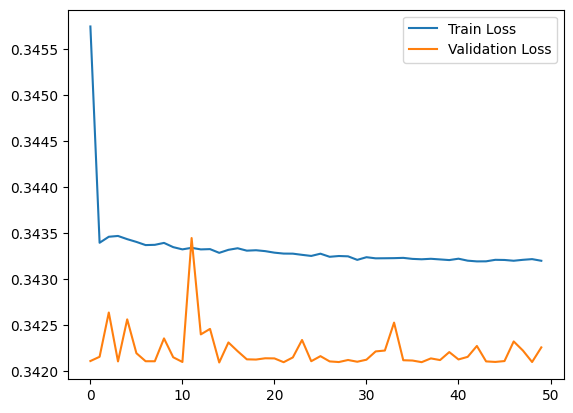

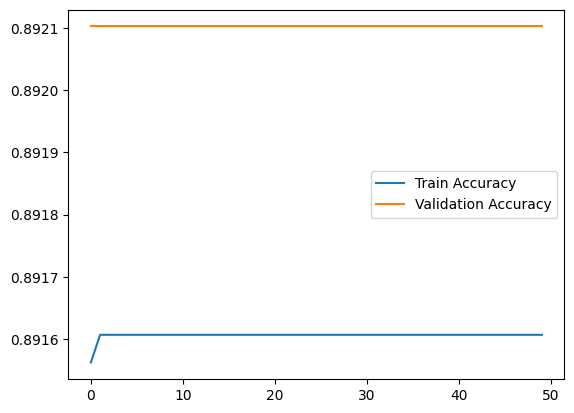

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [34]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)
print(predictions[:10])

3290/3290 ━━━━━━━━━━━━━━━━━━━━ 2s 711us/step
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
